In [1]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import gensim
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = './dataset/pubmed-choose.txt'

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format(
        './model/pubmed_sg_model', binary=False)
print('load the model')

load the model


In [4]:
# model = gensim.models.KeyedVectors.load_word2vec_format(
#         './glove/enwiki-tiny/enwiki_vectors.txt', binary=False)
# print('load the model')

In [5]:
# model.get_vector('china')

In [6]:
model.most_similar('crossover')

[('NOURISH', 0.2892095446586609),
 ('mistletoe', 0.2860276401042938),
 ('scaling', 0.2666185796260834),
 ('casein', 0.2591874599456787),
 ('dating', 0.2543487846851349),
 ('DBM', 0.2538706064224243),
 ('contributes', 0.2523080110549927),
 ('Visits', 0.24840913712978363),
 ('Interim', 0.24649739265441895),
 ('Record', 0.24493013322353363)]

In [7]:
def word_list(file_path):
    lines = open(file_path).readlines()
    # print(lines)
    word_list = []
    for line in lines:
        word = line.replace('\n', '')
        # print(word)
        word_list.append(word)
        # word_list.append(line)
    return word_list

In [8]:
words = word_list(file_path)
# print(words)
words.remove('hiv')
words.remove('bmi')
words.remove('il')
words.remove('vas')
words.remove('qol')
print(words)

['evaluate', 'ratio', 'reduction', 'been', 'period', 'other', '01', 'can', 'improved', 'ml', 'double', '11', 'only', 'well', 'b', 'receive', 'increase', 'self', 'kg', 'whether', 'level', 'greater', 'postoperative', 'it', 'evaluated', 'single', 'when', '16', 'activity', 'physical', 'pressure', 'reduced', 'overall', 'improvement', 'blind', 'median', 'arm', '13', 'different', 'conducted', 'survival', 'index', 'studies', '40', 'phase', '60', 'term', 'randomised', 'measures', 'h', 'within', 'less', 'found', 'hospital', 'i', 'effectiveness', 'decreased', 'l', 'most', 'incidence', 'oral', 'early', 'gov', 'trials', 'assess', 'diabetes', 'min', 'improve', 'interval', 'type', 'positive', 'acute', 'body', 'clinicaltrials', 'plus', 'serum', 'compare', 'enrolled', 'determine', 'statistically', 'four', 'hours', '17', 'confidence', 'mm', 'following', 'long', 'm', 'assessment', '100', 'prospective', '28', 'chronic', 'receiving', 'plasma', 'healthy', 'our', 'drug', '21', '36', 'depression', 'including'

In [9]:
dataset = []
for word in words:
    if word != 'hiv':
        dataset.append(model.get_vector(word))

In [10]:
dataset_embedded = TSNE(n_components=2, early_exaggeration=6).fit_transform(dataset)

/home/chenyiwei/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenyiwei/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


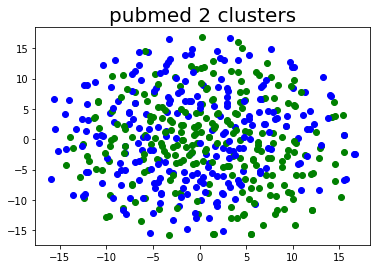

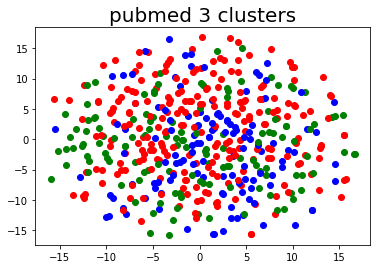

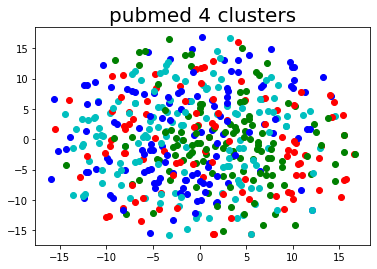

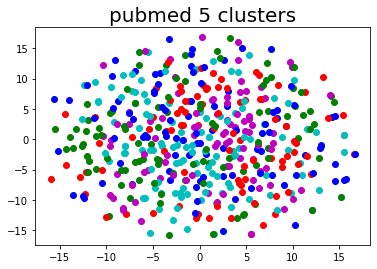

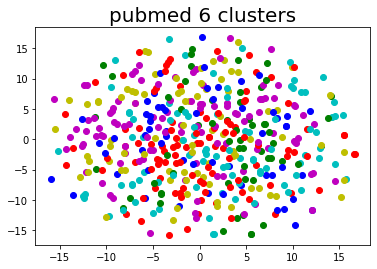

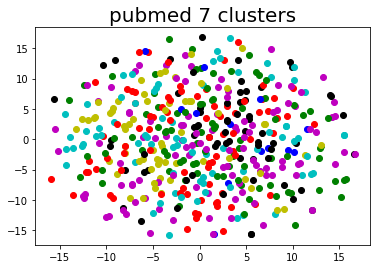

In [11]:
for num_cluster in range(2, 8):
    # do the kmeans algorithm
    km_cluster = KMeans(n_clusters=num_cluster, max_iter=1000, init='k-means++')
    km_cluster.fit(dataset)
    # start draw the image
    cents = km_cluster.cluster_centers_  # the centroid
    '''for cent in cents:
        idx = get_key(dataset, cent)
        print(idx)
        plt.scatter(dataset_embedded[idx][0], dataset_embedded[idx][1], c='r', marker='*')'''
    labels = km_cluster.labels_
    mark = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    j = 0   # to count the point in the dataset
    '''flag = 0   # to judge which cluster should the point belog
    n_p = 0    # to count how many point already been drew
    for label in labels:
        if flag == num_cluster:
            break
        if label == flag:
            plt.scatter(dataset_embedded[j][0], dataset_embedded[j][1], c=mark[label])
            n_p += 1
        if n_p == num_point:
            n_p = 0
            flag += 1
        j += 1'''
    for label in labels:
        plt.scatter(dataset_embedded[j][0], dataset_embedded[j][1], c=mark[label])
        j += 1
    plt.title('pubmed '+str(num_cluster)+' clusters', fontsize=20)
    plt.savefig('./pubmed_image/pubmed_sg_' + str(num_cluster) + '_clusters.jpg')
    plt.show()

In [12]:
# words= ['eye','ear','eyeball','mouth',"eyebrow","wrist","lip","hand","finger",'forehead','bike','biking','motorcycle','scotter','bicycle','motorbike','motorcross','bus','car','taxi','orange','banana','watermelon','pineapple','pear',"cherry",'lemon','coconut','apple','mango','chemistry','physics','biology','geophysics','microbiology',"ecology",'biochemistry','biophysics','immunology','history']
# word1 = ['dog','elephant','lion','horse','cat','deer','monkey','frog','duck','rabbit']
# words = words + word1

In [13]:
words = []
w_list = ['injection','system', 'acid', 'disease', 'syndrome']
for w in w_list:
    list = model.most_similar(w) 
    for item in list:
        words.append(item[0])
words

['uric',
 'CoQ10',
 'directives',
 'into',
 'apricoxib',
 'Visits',
 '797',
 'besides',
 'Median',
 'circumstances',
 'upgrade',
 'KRAS',
 'circuits',
 '449',
 'inclusive',
 'ending',
 'altitude',
 'twofold',
 '3000',
 'NSS',
 'transporter',
 'Metabolic',
 'wake',
 'Acetazolamide',
 'underweight',
 'Testing',
 'MPs',
 'Pelvic',
 'amenable',
 'sciatica',
 '084',
 '60years',
 'metabolism',
 'activates',
 'tratt',
 'vaccine',
 'Atrial',
 'hopefully',
 'Icelandic',
 'resuscitation',
 'Sexual',
 'inductive',
 'tubules',
 'sizes',
 'crises',
 'signature',
 'pEGF',
 'YPT',
 'expenditure',
 'Spasticity']

In [14]:
# words1 = ['亚洲', '东南亚','欧洲', '拉丁美洲','南亚', '非洲', '美洲'， '东亚']

/home/chenyiwei/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenyiwei/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


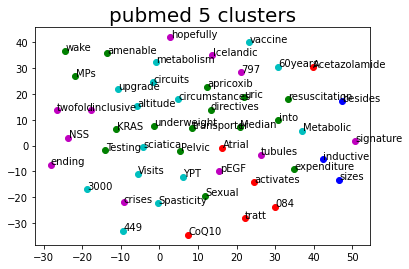

In [15]:
# import matplotlib as mpl
# from matplotlib.font_manager import _rebuild
# _rebuild()
# mpl.rcParams[u'font.sans-serif'] = ['simhei']
# dataset2 = []
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# from matplotlib.font_manager import FontProperties
# font = FontProperties(fname=r"/home/chenyiwei/anaconda3/envs/nlp/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf", size=14)
dataset2 = []
for word in words:
    try:
        dataset2.append(model.get_vector(word))
    except:
        pass
dataset_embedded = TSNE(n_components=2, early_exaggeration=6).fit_transform(dataset2)
        # for diff num of clusters, to do the cluster algorithm

for num_cluster in range(5, 6):
    # do the kmeans algorithm
    km_cluster = KMeans(n_clusters=num_cluster, max_iter=1000, init='k-means++')
    km_cluster.fit(dataset2)
    # start draw the image
    cents = km_cluster.cluster_centers_  # the centroid

    labels = km_cluster.labels_
    mark = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    j = 0   # to count the point in the dataset

    for label in labels:
        plt.scatter(dataset_embedded[j][0], dataset_embedded[j][1], c=mark[label])

        plt.annotate(words[j],xy=(dataset_embedded[j][0], dataset_embedded[j][1]),xytext=(dataset_embedded[j][0]+0.1, dataset_embedded[j][1]+0.1))
        j += 1
    plt.title('pubmed '+str(num_cluster)+' clusters', fontsize=20)
    plt.savefig('./pubmed_image/' + 'pubmed_sg_CaseStudy_'+ str(num_cluster) + '_cluster.jpg',dpi=500)
    plt.show()

In [ ]:
# !pip install mplfonts -i https://pypi.tuna.tsinghua.edu.cn/simple

In [36]:
# import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# mpl.rcParams['axes.unicode_minus'] = False